In [188]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
import matplotlib as mpl
import scipy
mpl.rc('font',family='Times New Roman')
path = r'/Users/cesarzambrano/Downloads/lab 6/'
#save_path = r'/Users/nglaser3/Downloads/lab6_deliv/'
font = {'fontname':'Times New Roman'}
size = {'fontsize':12}

In [193]:
keys = os.listdir(path)
keys = sorted(keys)
Dict = {}
for key in keys:
    file = pd.read_csv(path+key,header=11,skipfooter=14,engine='python')
    file = np.array(file)
    Dict[key]=file
#e1_keys = keys[-5:]
#pb_keys = keys[13:18]
#fe_keys = keys[7:12]
#al_keys = keys[1:6]
#none = keys[12]
#back = keys[6]
#unk = keys[0]
#e1_keys = np.append(e1_keys,unk)


e1_keys = keys[-6:-1]
pb_keys = keys[12:17]
fe_keys = keys[6:11]
al_keys = keys[0:5]
none = keys[11]
back = keys[5]
unk = keys[-1]
e1_keys = np.append(e1_keys,unk)
e1_keys

array(['t1_ba133.Spe', 't1_co60.Spe', 't1_cs137.Spe', 't1_mn54.Spe',
       't1_na22.Spe', 't1_unk.Spe'], dtype='<U12')

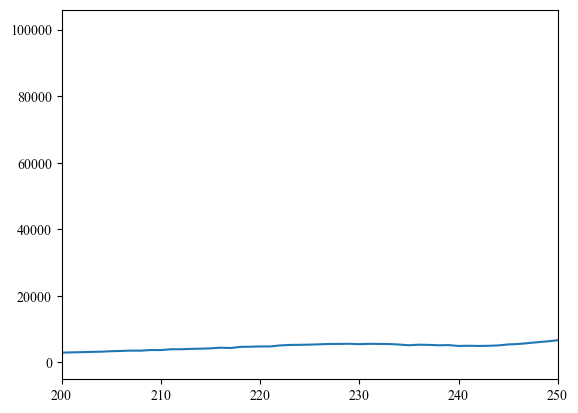

In [223]:
#Part 1 question 3 #ignore this guy
ke = e1_keys[0]
y = Dict[ke]
x = np.arange(0,len(y))
plt.plot(x,y,label = ke)
plt.xlim(200,250)

plt.show()

In [199]:
def act(thalf,unit):
    t_elap = 6.5*365*24*3600
    assert(type(unit) == str)
    if unit == 's':
        lam = np.log(2)/thalf
        Ci = np.exp(-lam*t_elap)
        return(Ci)
    if unit == 'd':
        thalf *= (24*3600)
        lam = np.log(2)/thalf
        Ci = np.exp(-lam*t_elap)
        return(Ci)
    if unit == 'y':
        thalf *= (365*24*3600)
        lam = np.log(2)/thalf
        Ci = np.exp(-lam*t_elap)
        return(Ci)
    else:
        return('Invalid Unit Input')

act_ba = np.round(act(10.551,'y'),5)
act_co = np.round(act(1925.28,'d'),5)
act_cs = np.round(act(30.08,'y'),5)
act_mn = np.round(act(312.20,'d'),5)
act_na = np.round(act(2.6018, 'y'),5)
activ = np.array([act_co,act_cs,act_mn,act_na,act_ba])


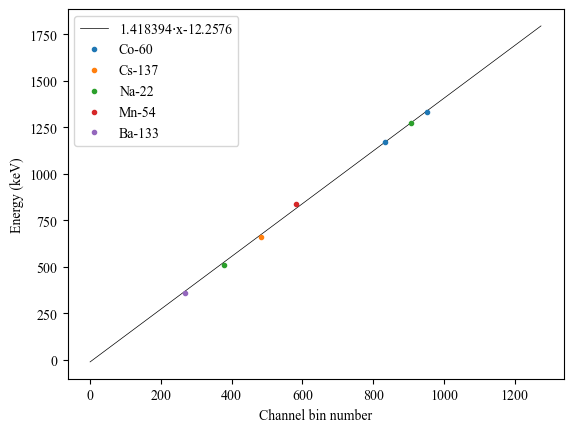

In [240]:
#calib curve

#cobalt 60 
loc_co = np.array([832,951])
en_co = np.array([1173,1333])

#ba 133
loc_ba = np.array([269])
en_ba = np.array([356])

#cs 137
loc_cs = np.array([484])
en_cs = np.array([662])

#mn 54
loc_mn = np.array([581])
en_mn = np.array([835])

#na 22
loc_na = np.array([377.5,908])
en_na = np.array([511,1275])

locs = np.array([832,951,484,581,377.5,908,0,268])

en = np.array([1173,1333,662,835,511,1275,0,356])
fit = scipy.stats.linregress(locs, en)
m = fit.slope
b = fit.intercept
m = np.around(m,6)
m_err = fit.stderr
b_err = fit.intercept_stderr
x_arr = np.arange(0,1275)

lobf_name = '{}$\cdot$x'.format(m)+str(np.around(b,4))

plt.plot(x_arr,x_arr*m+b,label = lobf_name, color = "k",linewidth = .5)
plt.plot(loc_co,en_co,'.' ,label = 'Co-60')
plt.plot(loc_cs,en_cs,'.' ,label = 'Cs-137')
plt.plot(loc_na,en_na,'.' ,label = 'Na-22')
plt.plot(loc_mn,en_mn,'.' ,label = 'Mn-54')
plt.plot(loc_ba,en_ba,'.' ,label = 'Ba-133')
plt.legend()
plt.xlabel('Channel bin number')
plt.ylabel('Energy (keV)')
#plt.savefig('LAB6_P1_DEL1',dpi=600)
plt.show()

def error_finder(x): #x is the channel number NOT the energy
    err = np.sqrt(m_err**2*x**2+b_err**2)
    return err

In [241]:
#part 1 question 2
#bg = Dict[back]/15
#name = ['ba133','co60','cs137','mn54','na22','unk']
#for i in range(len(e1_keys)):
    #y = Dict[e1_keys[i]]/5-bg
    #x = np.arange(0,len(y))*m
    #y[0:40] = 0
    #plt.hist(x,bins = len(x),weights = y,color = 'k',label=name[i])
    #if name[i] == 'unk':
        #plt.bar(661.7,932,color = 'magenta', width = 10 )
        #print(max(y[200:]),m)
    #plt.xlim(0,1750)
    #plt.savefig(save_path+name[i]+'.png')
    #plt.legend()
    #plt.show()
#plt.hist(x,bins = len(x),weights = bg,color = 'k',label = 'Background')
#plt.plot(1460,max(bg[900:]),color = 'magenta',marker = 's',ms = 2)
#plt.legend()
#plt.xlim(0,1750)
#plt.show()

#np.where(y!=0)

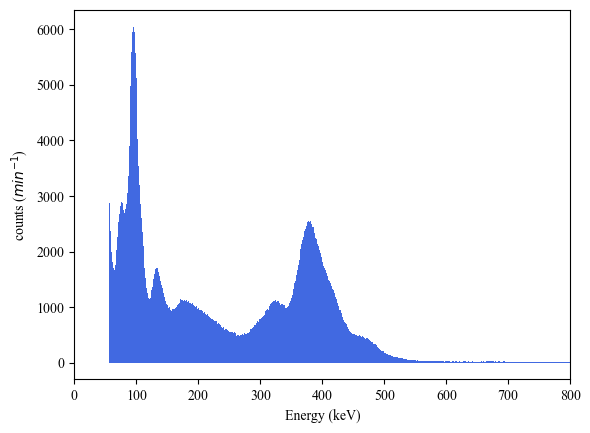

In [229]:
#barium 133
bg = Dict[back]/15
y = Dict[e1_keys[0]]/5-bg
x = np.arange(0,len(y))*m
y[0:40] = 0
plt.hist(x,bins = len(x),weights = y,color = 'royalblue'),#label=name[0])
plt.xlim(0,800)
plt.ylabel('counts ($min^{-1}$)')
plt.xlabel('Energy (keV)')
#plt.savefig('LAB6_P1_DEL2_BA133',dpi=600)
plt.show()

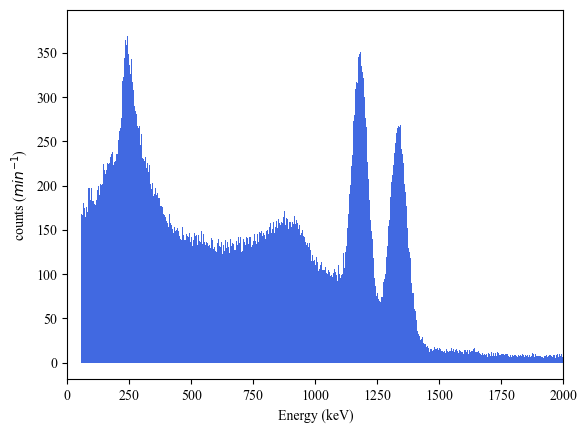

In [230]:
#cobalt 60
bg = Dict[back]/15
y = Dict[e1_keys[1]]/5-bg
x = np.arange(0,len(y))*m
y[0:40] = 0
plt.hist(x,bins = len(x),weights = y,color = 'royalblue'),#label=name[0])
plt.xlim(0,2000)
plt.ylabel('counts ($min^{-1}$)')
plt.xlabel('Energy (keV)')
#plt.savefig('LAB6_P1_DEL2_CO60',dpi=600)
plt.show()

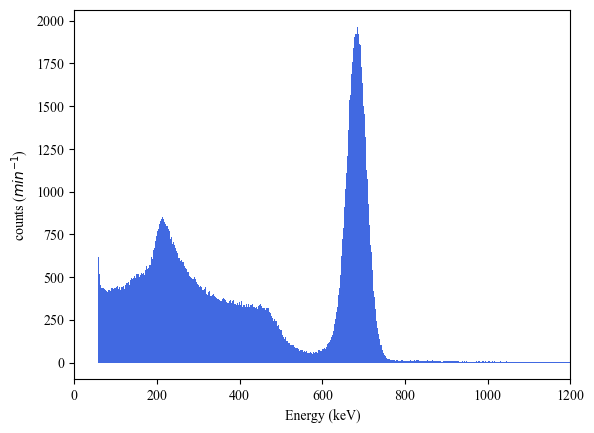

In [231]:
#cesium 137
bg = Dict[back]/15
y = Dict[e1_keys[2]]/5-bg
x = np.arange(0,len(y))*m
y[0:40] = 0
plt.hist(x,bins = len(x),weights = y,color = 'royalblue')
plt.xlim(0,1200)
plt.ylabel('counts ($min^{-1}$)')
plt.xlabel('Energy (keV)')
#plt.savefig('LAB6_P1_DEL2_Cs137',dpi=600)
plt.show()

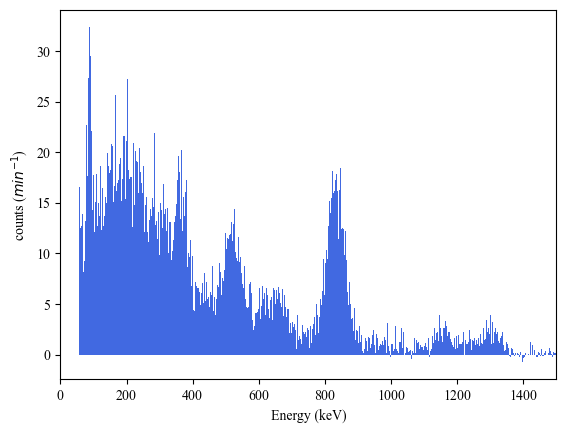

In [232]:
#mangenese 54
bg = Dict[back]/15
y = Dict[e1_keys[3]]/5-bg
x = np.arange(0,len(y))*m
y[0:40] = 0
plt.hist(x,bins = len(x),weights = y,color = 'royalblue'),#label=name[0])
plt.xlim(0,1500)
plt.ylabel('counts ($min^{-1}$)')
plt.xlabel('Energy (keV)')
#plt.savefig('LAB6_P1_DEL2_Mn54',dpi=600)
plt.show()

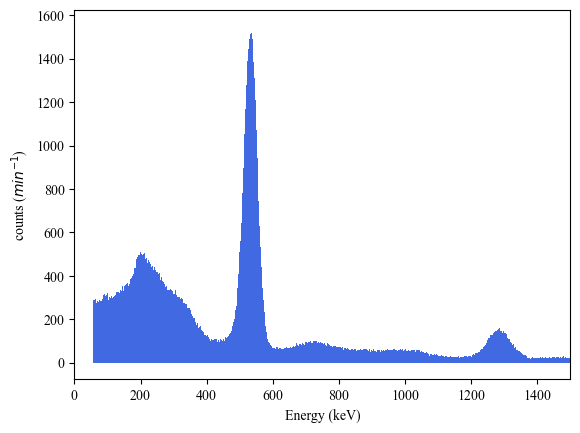

In [233]:
#na 22
bg = Dict[back]/15
y = Dict[e1_keys[4]]/5-bg
x = np.arange(0,len(y))*m
y[0:40] = 0
plt.hist(x,bins = len(x),weights = y,color = 'royalblue'),#label=name[0])
plt.xlim(0,1500)
plt.ylabel('counts ($min^{-1}$)')
plt.xlabel('Energy (keV)')
#plt.savefig('LAB6_P1_DEL2_Na22',dpi=600)
plt.show()

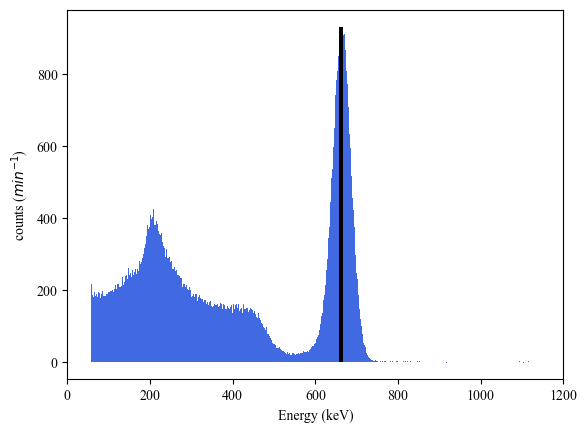

In [234]:
#unknown
bg = Dict[back]/15
y = Dict[e1_keys[5]]/5-bg
x = np.arange(0,len(y))*m
y[0:40] = 0
plt.hist(x,bins = len(x),weights = y,color = 'royalblue')
plt.bar(661.7,932,color = 'k', width = 10 )
plt.xlim(0,1200)
plt.ylabel('counts ($min^{-1}$)')
plt.xlabel('Energy (keV)')
#plt.savefig('LAB6_P1_DEL2_Unk',dpi=600)
plt.show()

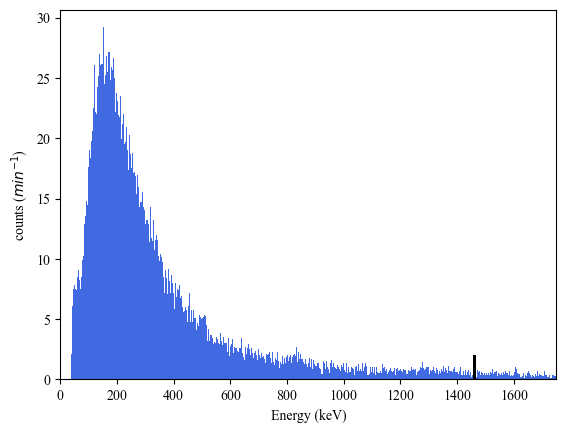

In [235]:
#background
bg = Dict[back]/15
plt.hist(x*m,bins = len(x),weights = bg,color = 'royalblue',label = 'Background')
plt.bar(1460,2,color = 'k', width = 10 )
plt.xlim(0,1750)
plt.ylabel('counts ($min^{-1}$)')
plt.xlabel('Energy (keV)')
#plt.savefig('LAB6_P1_DEL2_BACK',dpi=600)
plt.show()

In [68]:
#Part 1 question 3 #ignore this guy
#ke = e1_keys[0]
#y = Dict[ke]#[200:300]
#x = np.arange(0,len(y))
#plt.plot(x,y,label = ke)
#plt.legend()
#plt.xlim(200,500)
#plt.show()
#plt.ylim(0,20000)
#np.trapz(y[890:1000],x[890:1000])
#np.trapz(y[890:1000].T,x[890:1000]*m)
#sum(y)

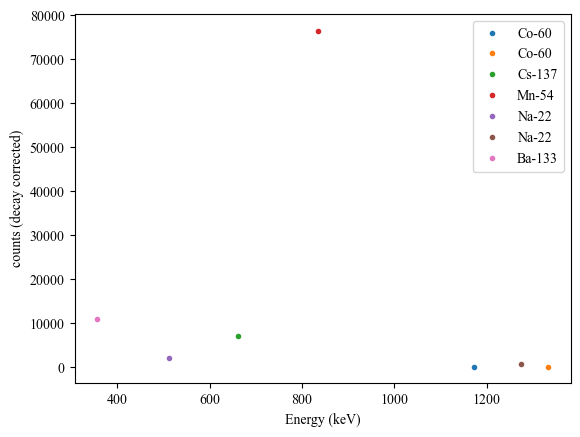

(array([23.35634995, 24.63033268, 16.56177542, 16.56177542, 14.86313179,
        25.9043154 , 19.53440178]),
                           Co-60        Co-60      Cs-137       Mn-54  \
 Peak Centroid       1180.103808  1348.892694  686.502696  824.086914   
 Associated Error      16.449181    17.974828   12.538639   13.519909   
 Expected Energies   1173.000000  1333.000000  661.700000  835.000000   
 Standard Deviation    23.356350    24.630333   16.561775   16.561775   
 FWHM                  78.011670    82.266852   55.317366   55.317366   
 
                          Na-22        Na-22      Ba-133  
 Peak Centroid       535.443735  1287.901752  381.547986  
 Associated Error     11.597724    17.415744   10.823335  
 Expected Energies   511.000000  1275.000000  384.000000  
 Standard Deviation   14.863132    25.904315   19.534402  
 FWHM                 49.643790    86.522034   65.246124  )

In [260]:
co_lp = [780,880]
co_hp = [890,1000]
ba_p = [250,300]
cs_p = [450,525]
mn_p = [570,610]
na_lp = [340,410]
na_hp = [860,960]
peak_locs = np.array([co_lp,co_hp,cs_p,mn_p,na_lp,na_hp,ba_p])
j = np.array([0,0,1,2,3,3,4])
schubert = np.array([1,1,2,3,4,4,0])
names = ['Co-60','Cs-137','Mn-54','Na-22','Ba-133']
energies = np.array([1173,1333,662,835,511,1275,356])
locs = np.array([832,951,484,581,377.5,908,269])
fwhm_arr = np.array([])
dev_arr = np.array([])
ass_err = np.array([])
branchs = np.array([1,1,.85,1,.898,1,.6205*(1/(0.6))])
for i in range(len(peak_locs[:,0])):
    a = peak_locs[i,0]
    b = peak_locs[i,1]
    
    #fwhm
    #print(schubert[i])
    y = Dict[e1_keys[schubert[i]]][a:b]/5-bg[a:b]/15
    half_max = 0
    for k in range(len(y)):
        if y[k]>= max(y)/2:
            half_max += 1
    fwhm_arr = np.append(fwhm_arr,half_max*m)
    std_dev = half_max/2.35482
    dev_arr = np.append(dev_arr,std_dev)
    ass_error = error_finder(locs[i])
    ass_err = np.append(ass_err,ass_error)
    a,b = int(locs[i]-half_max/2),int(locs[i]+half_max/2)
    y = Dict[e1_keys[j[i]]]/5-bg
    x = np.arange(0,len(y))
    c_p = np.trapz(y[a:b].T,x[a:b])/(activ[j[i]]*branchs[i])
    #print(j[i],names[j[i]],activ[j[i]],half_max)
    #if i !=3:    
    plt.plot(energies[i],c_p,'.',label=names[j[i]])
    plt.legend()
plt.ylabel('counts (decay corrected)')
plt.xlabel('Energy (keV)')
plt.savefig('LAB6_P1_DEL3_NUP',dpi=600)
plt.show()


names = ['Co-60','Co-60','Cs-137','Mn-54','Na-22','Na-22','Ba-133']
rows = ['Peak Centroid','Associated Error','Expected Energies','Standard Deviation','FWHM']
got_ener = np.array([832,951,484,581,377.5,908,269])*m
expe_ener = np.array([1173,1333,661.7,835,511,1275,384])
thingaroni = np.array([got_ener,ass_err,expe_ener,dev_arr,fwhm_arr])
table = pd.DataFrame(thingaroni)
table.columns = names
table.index = rows
dev_arr,table

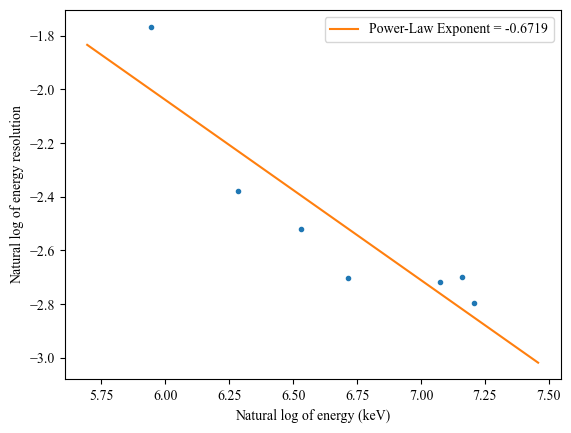

In [264]:
R = np.zeros(len(got_ener))
ln_peak = np.zeros(len(got_ener))
for i in range(len(got_ener)):
    R[i] = np.log(fwhm_arr[i]/got_ener[i])
    ln_peak[i] = np.log(got_ener[i])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ln_peak, R)
slope = np.around(slope,4)
plt.plot(ln_peak,R,'.')
x_arr = np.linspace(min(ln_peak)-.25,max(ln_peak)+.25,100)
plt.plot(x_arr,x_arr*slope+intercept,label = 'Power-Law Exponent = {}'.format(slope))
plt.legend()
plt.xlabel('Natural log of energy (keV)')
plt.ylabel('Natural log of energy resolution')
plt.savefig('LAB6_P1_DEL4',dpi=600)
plt.show()

In [109]:
#error thing
fekeys = np.append(fe_keys,none)
pbkeys = np.append(pb_keys,none)
alkeys = np.append(al_keys,none)
fe_roi = np.array([])
pb_roi = np.array([])
al_roi = np.array([])
for key in fekeys:
    sum_ = sum(Dict[key][425:500])
    fe_roi = np.append(fe_roi,sum_)
for key in alkeys:
    sum_ = sum(Dict[key][425:500])
    al_roi = np.append(al_roi,sum_)
for key in pbkeys:
    sum_ = sum(Dict[key][425:500])
    pb_roi = np.append(pb_roi,sum_)
    
error_fe = []
for i in range(len(fe_roi)):
    err = np.sqrt(1/fe_roi[i])
    error_fe = np.append(error_fe,err)
    
error_al = []
for i in range(len(al_roi)):
    err = np.sqrt(1/al_roi[i])
    error_al = np.append(error_al,err)

error_pb = []
for i in range(len(pb_roi)):
    err = np.sqrt(1/pb_roi[i])
    error_pb = np.append(error_pb,err)

error_fe,error_al,error_pb

(array([0.01224347, 0.01708217, 0.02267463, 0.02966954, 0.03548867,
        0.00873171]),
 array([0.01084015, 0.01333215, 0.01645993, 0.01974111, 0.02350502,
        0.00873171]),
 array([0.01221603, 0.01662745, 0.02247901, 0.02931052, 0.0347524 ,
        0.00873171]))

In [267]:
#part 2 of the lab

fekeys = np.append(fe_keys,none)
pbkeys = np.append(pb_keys,none)
alkeys = np.append(al_keys,none)
fe_roi = np.array([])
pb_roi = np.array([])
al_roi = np.array([])
for key in fekeys:
    sum_ = sum(Dict[key][425:500])
    fe_roi = np.append(fe_roi,sum_)
for key in alkeys:
    sum_ = sum(Dict[key][425:500])
    al_roi = np.append(al_roi,sum_)
for key in pbkeys:
    sum_ = sum(Dict[key][425:500])
    pb_roi = np.append(pb_roi,sum_)

al_t = np.array([25.4,50.9,76.3,76.3+25.4,76.3+25.5+25.5,0])/10
pb_t = np.array([7.92,15.74,23.59,30.24,36.9,0])/10
fe_t = np.array([13.1,26.2,39.3,52.4,66.2,0])/10

for i in range(len(fe_roi)):
    fe_roi[i] = np.log(fe_roi[i])
for i in range(len(al_roi)):
    al_roi[i] = np.log(al_roi[i])
for i in range(len(pb_roi)):
    pb_roi[i] = np.log(pb_roi[i])
    
#error    
mfe,bfe = np.polyfit(fe_t,error_fe,1)
mae,bae = np.polyfit(al_t,error_al,1) 
mpe,bpe = np.polyfit(pb_t,error_pb,1)

mf,bf = np.polyfit(fe_t,fe_roi,1)
ma,ba = np.polyfit(al_t,al_roi,1) 
mp,bp = np.polyfit(pb_t,pb_roi,1) 

r_fe = np.around(7.704E-02*7.874,4)
r_al = np.around(7.802E-02*2.7,4)
r_pb = np.around(1.248E-01*11.34,4)

pb_roi

array([8.81001205, 8.19340023, 7.59034695, 7.05961763, 6.71901315,
       9.48158814])

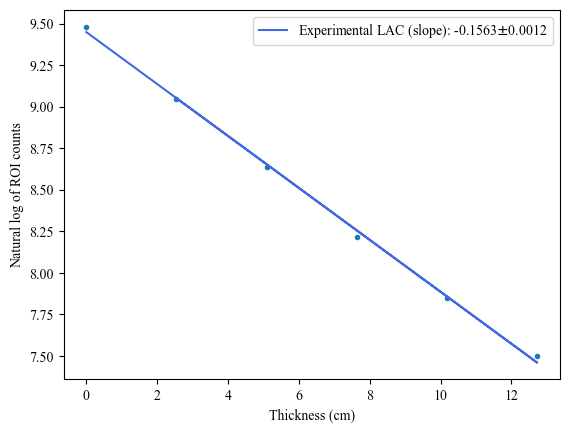

In [271]:
plt.plot(al_t,al_roi,'.')
plt.plot(al_t,al_t*ma+ba,color='royalblue',label = 'Experimental LAC (slope):'+' '+str(np.round(ma,4))+'$\pm$'+str(np.round(mae,4)))
plt.legend()
plt.xlabel('Thickness (cm)')
plt.ylabel('Natural log of ROI counts')
plt.legend()
plt.savefig('LAB6_P2_AL',dpi=600)
plt.show()

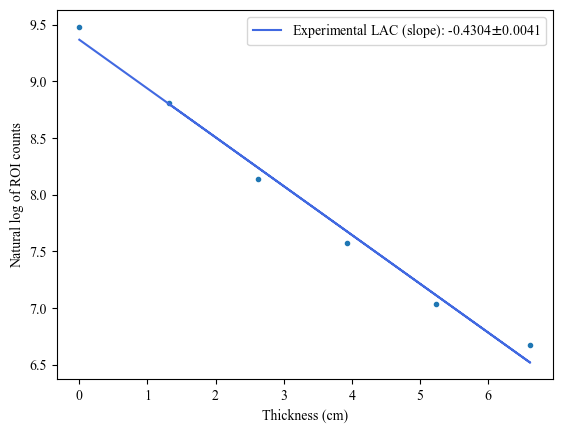

In [272]:
plt.plot(fe_t,fe_roi,'.')
plt.plot(fe_t,fe_t*mf+bf,color='royalblue',label = 'Experimental LAC (slope):'+ ' '+str(np.round(mf,4))+'$\pm$'+str(np.round(mfe,4)))
plt.legend()
plt.xlabel('Thickness (cm)')
plt.ylabel('Natural log of ROI counts')
plt.savefig('LAB6_P2_FE',dpi=600)
plt.show()

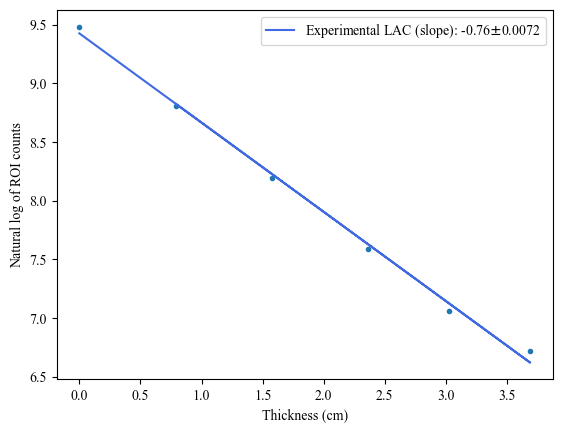

In [274]:
plt.plot(pb_t,pb_roi,'.')
plt.plot(pb_t,pb_t*mp+bp,color='royalblue',label = 'Experimental LAC (slope):'+ ' ' +str(np.round(mp,4))+'$\pm$'+str(np.round(mpe,4)))
plt.legend()
plt.xlabel('Thickness (cm)')
plt.ylabel('Natural log of ROI counts')
plt.savefig('LAB6_P2_PB',dpi=600)
plt.show()

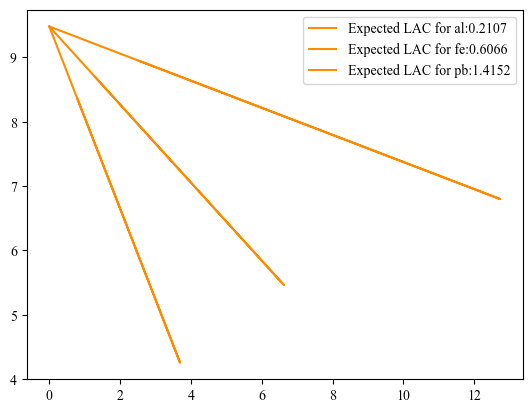

In [140]:
plt.plot(al_t,-al_t*r_al+al_roi[-1],color='darkorange',label= 'Expected LAC for al:'+ str(np.round(r_al,4)))
plt.plot(fe_t,-fe_t*r_fe+fe_roi[-1],color='darkorange',label= 'Expected LAC for fe:'+ str(np.round(r_fe,4)))
plt.plot(pb_t,-pb_t*r_pb+pb_roi[-1],color='darkorange',label= 'Expected LAC for pb:'+ str(np.round(r_pb,4)))
plt.legend()